# Numpy简述

In [45]:
import numpy as np

## 一、生成数组
生成数组，使用命令np.array(),括号里的数据类型为系列（list）

In [46]:
a=[1,2,3,4,5,6,7,8]             #a是系列(list)
b=np.array(a)           #b是数组
print(a,b)              #打印a和b
print(type(a),type(b))  #查看a和b的类型

[1, 2, 3, 4, 5, 6, 7, 8] [1 2 3 4 5 6 7 8]
<class 'list'> <class 'numpy.ndarray'>


对数组进行操作：

In [47]:
b=b.reshape(2,4)      #改变数组的维度
print(b)              #从原来的1x8变成2x4 （两行四列）
#元素访问
print("取第1行第2列元素：",b[1][2])  #注意是从0行0列开始数！！！

[[1 2 3 4]
 [5 6 7 8]]
取第1行第2列元素： 7


变成三维数组：

In [48]:
c=b.reshape(2,2,2)
print(c)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


特殊的数组有特别定制的命令生成，如零和1矩阵:

In [49]:
d=(3,4)
print(np.zeros(d))          #零矩阵
print(np.ones(d))           #1矩阵
#默认生成的类型是浮点型，可以通过指定类型改为整型
print(np.ones(d,dtype=int))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


## 二、常用函数

### 随机数
`arange`指定范围和数值间的间隔生成 `array`，注意范围包左不包右，金融分析常常需要产生随机数，Numpy的random函数派上用场。


注意：系统自带的`range`生成的是`tupe`,要产生`list`需要使用循环取出元素

In [50]:
#使用range产生list
L=[i for i in a]
print(L)

b=np.arange(10)     #注意包含0，不包含10
c=np.arange(0,10,2) #2表示间隔
d=np.arange(1,10,3) #3表示间隔
print(b,c,d)


[1, 2, 3, 4, 5, 6, 7, 8]
[0 1 2 3 4 5 6 7 8 9] [0 2 4 6 8] [1 4 7]


### 均匀分布

In [51]:
a=np.random.rand(3,4)      #创建指定为3行4列)的数组(范围在0至1之间)
b=np.random.uniform(0,100) #创建指定范围内的一个数
c=np.random.randint(0,100) #创建指定范围内的一个整数
print("创建指定为3行4列)的数组：\n",a)   #\n 表示换行
print("创建指定范围内的一个数：%.2f" %b) #%.2f 表示结果保留2位小数
print("创建指定范围内的一个整数：",c)

创建指定为3行4列)的数组：
 [[0.28908331 0.61979608 0.57200736 0.22087504]
 [0.62630447 0.60914422 0.67775914 0.36629345]
 [0.45610291 0.30254497 0.89829401 0.63468306]]
创建指定范围内的一个数：33.99
创建指定范围内的一个整数： 26


### 正态分布
给定均值/标准差/维度的正态分布np.random.normal(u, r, (x, y)) 数组的索引

In [52]:
#正态生成3行4列的二维数组
a= np.random.normal(1.5, 3, (3, 4))  #均值为1.5，标准差为3
print(a)
# 截取第1至2行的第2至3列(从第0行、0列算起算起)
b = a[1:3, 2:4]
print("截取第1至2行的第2至3列: \n",b)

[[ 6.42724996 -1.82562568  2.60826588  2.97287961]
 [-3.32635023  2.54156341 -0.11608983 -0.62519763]
 [ 2.44576786 -1.45886593  4.85029198  2.62703712]]
截取第1至2行的第2至3列: 
 [[-0.11608983 -0.62519763]
 [ 4.85029198  2.62703712]]


## 三、数组运算

元素之间依次相加、减、乘、除；统计运算

In [53]:
a = np.array([1,2,3,4]) # 1行4列
b = np.array(2)

a-b,a+b

(array([-1,  0,  1,  2]), array([3, 4, 5, 6]))

In [54]:
## python的次方使用**实现：
a**2  #二次方，a里元素的平方

np.sqrt(a)  #开根号

np.exp(a)  #e 求方

np.floor(10*np.random.random((2,2))) #向下取整

a.resize(2,2) #变换结构
a

array([[1, 2],
       [3, 4]])

## 四、统计运算

需要知道二维数组的最大最小值怎么办？想计算全部元素的和、按行求和、按列求和怎么办？NumPy的ndarray类已经做好函数了


In [55]:
a=np.arange(20).reshape(4,5)
print("原数组a:\n",a)
print("a全部元素和: ", a.sum())
print("a的最大值: ", a.max())
print("a的最小值: ", a.min())
print("a每行的最大值: ", a.max(axis=1))  #axis=1代表行
print("a每列的最大值: ", a.min(axis=0))  #axis=0代表列
print("a每行元素的求和: ", a.sum(axis=1)) 
print("a每行元素的均值：",np.mean(a,axis=1))
print("a每行元素的标准差：",np.std(a,axis=1))

原数组a:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
a全部元素和:  190
a的最大值:  19
a的最小值:  0
a每行的最大值:  [ 4  9 14 19]
a每列的最大值:  [0 1 2 3 4]
a每行元素的求和:  [10 35 60 85]
a每行元素的均值： [ 2.  7. 12. 17.]
a每行元素的标准差： [1.41421356 1.41421356 1.41421356 1.41421356]


## 五、矩阵及其运算


In [56]:
A = np.array([[0,1], [1,2]])  #数组
B = np.array([[2,5],[3,4]])   #数组
print("对应元素相乘：\n",A*B)
print("矩阵点乘：\n",A.dot(B))
print("矩阵点乘：\n",np.dot(A,B))  #(M行, N列) * (N行, Z列) = (M行, Z列)
print("横向相加：\n",np.hstack((A,B)))
print("纵向相加：\n",np.vstack((A,B)))

对应元素相乘：
 [[0 5]
 [3 8]]
矩阵点乘：
 [[ 3  4]
 [ 8 13]]
矩阵点乘：
 [[ 3  4]
 [ 8 13]]
横向相加：
 [[0 1 2 5]
 [1 2 3 4]]
纵向相加：
 [[0 1]
 [1 2]
 [2 5]
 [3 4]]


数组可以通过`asmatrix`或者`mat`转换为矩阵，或者直接生成也可以

In [57]:
A=np.arange(6).reshape(2,3)
A=np.asmatrix(A)                        #将数组转化成矩阵
print (A)
B=np.matrix('1.0 2.0 3.0;4.0 5.0 6.0')  #直接生成矩阵
print(B)

A*B.T    #A和B已经是矩阵了，但A的列要与B的行相等才能相乘，对B进行转置（B.T）

[[0 1 2]
 [3 4 5]]
[[1. 2. 3.]
 [4. 5. 6.]]


matrix([[ 8., 17.],
        [26., 62.]])

## 六、线性代数运算

In [58]:
import numpy.linalg as nlg  #线性代数函数
import numpy as np
a=np.random.rand(2,2)
a=np.mat(a)
print(a)
ia=nlg.inv(a)
print("a的逆:\n",ia)

[[0.19309316 0.75459342]
 [0.27147412 0.04340557]]
a的逆:
 [[-0.22092582  3.84073171]
 [ 1.38174975 -0.98280611]]


求特征值和特征向量

In [59]:
a=np.array([2,4,3,9,1,4,3,4,2]).reshape(3,3)  
eig_value,eig_vector=nlg.eig(a)
print("特征值:",eig_value)
print("特征向量:",eig_vector)


特征值: [10.48331477 -4.48331477 -1.        ]
特征向量: [[-0.50772731 -0.36224208 -0.28571429]
 [-0.69600716  0.85881392 -0.42857143]
 [-0.50772731 -0.36224208  0.85714286]]


## 七、实例分析
假设股票收益率服从正态分布，使用numpy产生正态分布随机数，模拟股票收益率，并采用正态分布策略进行交易。

eg.假设有2000只股票，一年股市共250个交易日。一年365天-全民法定节假日=365-每周双休日*52-节日放假日  （国庆3天+春节3天+劳动节、元旦、清明、端午、中秋共11天）=365-104-11=250日,产生2000x500的数组。

In [60]:
stocks = 2000   # 2000支股票
days =  500  # 两年大约500个交易日
# 生成服从正态分布：均值期望＝0，标准差＝1的序列

stock_day = np.random.standard_normal((stocks, days))   
print(stock_day.shape)   #打印数据组结构
# 打印出前五只股票，头五个交易日的涨跌幅情况
print(stock_day[0:5, :5])

(2000, 500)
[[-0.41919149 -1.00662397 -1.31338162 -2.0052338  -1.09168037]
 [-0.08787091 -0.74099759  1.18544071  0.04764324  0.78207432]
 [-0.76370084  0.5865469   1.2352597  -0.13196563  2.06622671]
 [-2.76022473  0.45733102  1.84332186 -0.46357341 -1.06838599]
 [-0.00841653 -0.04745073 -1.44625915 -0.07519047  2.22538881]]


正态分布买入策略:

In [61]:
# 保留后250天的随机数据作为策略验证数据
keep_days = 250
# 统计前450, 切片切出0-250day，days = 500
stock_day_train = stock_day[:,0:days - keep_days]
# 打印出前250天跌幅最大的三支，总跌幅通过np.sum计算，np.sort对结果排序
print(np.sort(np.sum(stock_day_train, axis=1))[:3])
# 使用np.argsort针对股票跌幅进行排序，返回序号，即符合买入条件的股票序号
stock_lower = np.argsort(np.sum(stock_day_train, axis=1))[:3]
# 输出符合买入条件的股票序号
stock_lower

[-47.21194341 -46.00750233 -43.74935353]


array([ 190, 1970, 1295])

封装函数`plot_buy_lower()`可视化选中的前3只跌幅最大的股票前450走势以及从第454日买入后的走势

买入第190只股票，从第250个交易日开始持有盈亏：-1.51%
买入第1970只股票，从第250个交易日开始持有盈亏：-27.10%
买入第1295只股票，从第250个交易日开始持有盈亏：-16.42%


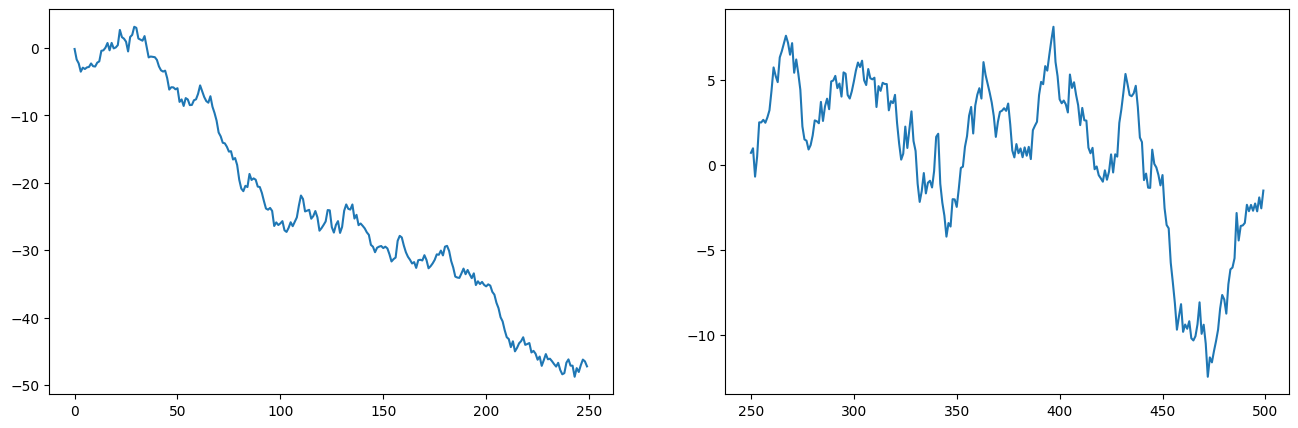

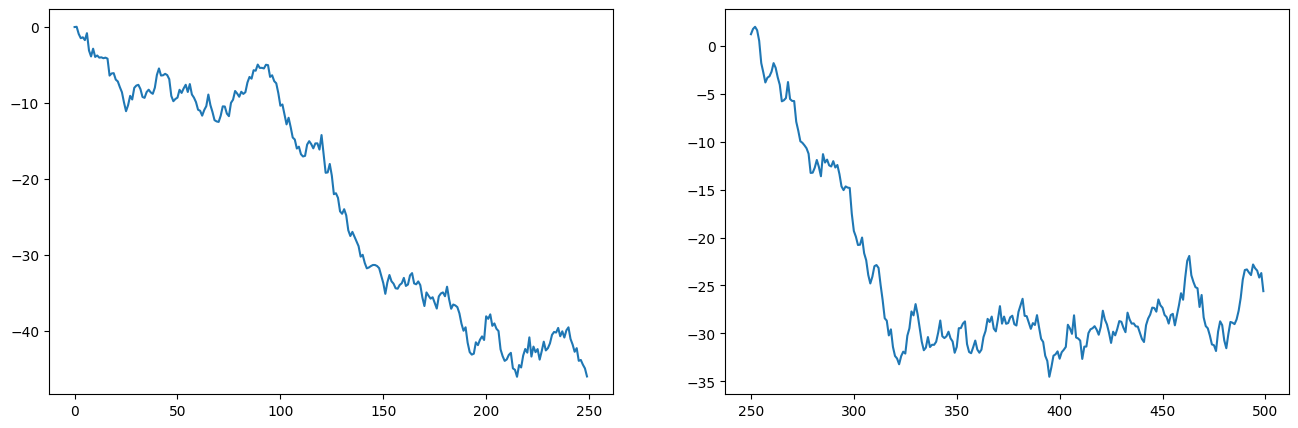

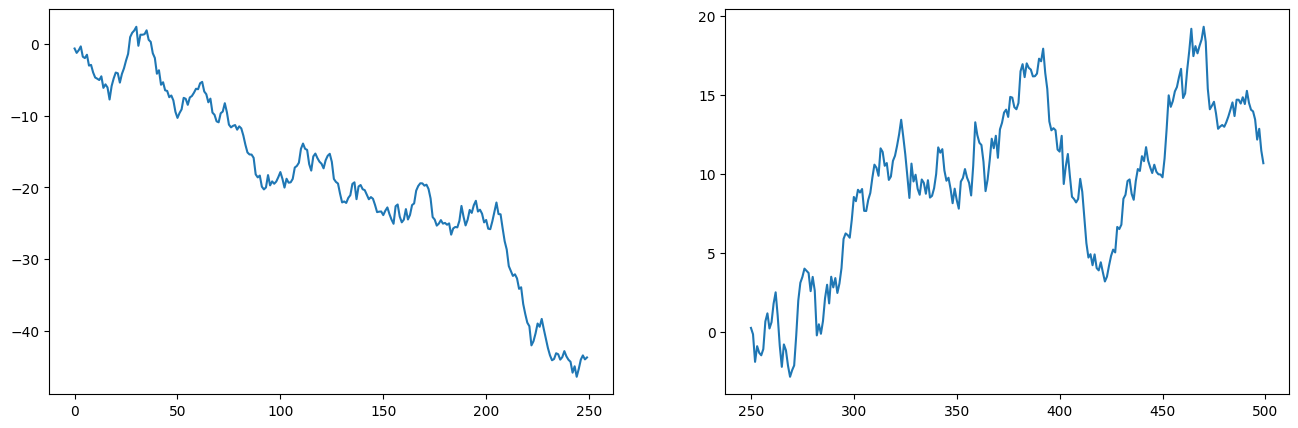

In [62]:
import matplotlib.pyplot as plt  #引入画图库
%matplotlib inline               
#python定义函数使用def 函数名：然后enter
def buy_lower(stock):
    #设置一个一行两列的可视化图表
    _, axs=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

    #绘制前450天的股票走势图，np.cumsum():序列连续求和
    axs[0].plot(np.arange(0,days-keep_days),
               stock_day_train[stock].cumsum())

    #从第250天开始到500天的股票走势
    buy=stock_day[stock][days-keep_days:days].cumsum()
    #绘制从第450天到500天中股票的走势图
    axs[1].plot(np.arange(days-keep_days,days),buy)
    #返回从第450天开始到第500天计算盈亏的盈亏序列的最后一个值
    return buy[-1]
#假设等权重地买入3只股票
profit=0  #盈亏比例
#遍历跌幅最大的3只股票序列序号序列
for stock in stock_lower:
    #profit即三只股票从第250天买入开始计算，直到最后一天的盈亏比例
    profit+=buy_lower(stock)
    print("买入第{}只股票，从第250个交易日开始持有盈亏：{:.2f}%".format(stock,profit))